CustomerID                    9616
TypeOfIncident                   4
TypeOfCollission                 3
SeverityOfIncident               4
IncidentState                    7
IncidentCity                     7
PropertyDamage                   2
PoliceReport                     2
InsuredGender                    2
InsuredEducationLevel            7
InsuredOccupation               14
InsuredHobbies                  20
Country                          2
InsurancePolicyState             3
Policy_CombinedSingleLimit       9
InsuredRelationship              6
dtype: int64


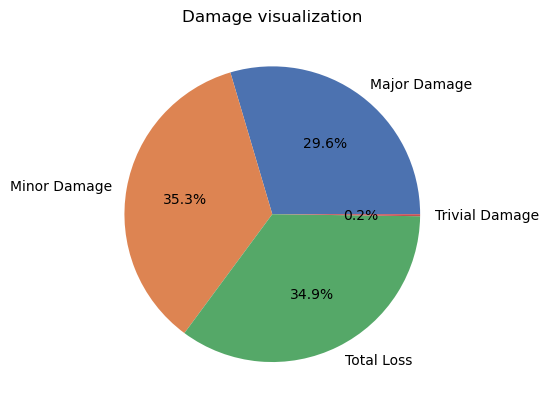

93.20623916811091
87.13910761154857
[[2025   41]
 [ 155  664]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2066
           1       0.94      0.81      0.87       819

    accuracy                           0.93      2885
   macro avg       0.94      0.90      0.91      2885
weighted avg       0.93      0.93      0.93      2885

0.8954498497092883
[0 0 1 ... 1 1 0]


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

label_encoder = LabelEncoder()
train_data = pd.read_csv("Data/Train Data/Train_Claim.csv", na_values=["?", "MISSEDDATA","NA","-1", "MISSINGVAL", "-5", "MISSINGVALUE"])

train_data.head()

def get_categorical_columns(df):
    categorical_columns = []
    threshold = 8000
    object_columns = df.select_dtypes(include=['object']).columns

    unique_values = df[object_columns].nunique()
    print(unique_values)
    for k, v in unique_values.items():
        if v <= threshold:
            categorical_columns.append(k)

    return categorical_columns

# Preprocessing

# Dropping rows with NA values. 
train_data = train_data.dropna()


# Removing "Cust" from CustomerId and "Location" from IncidentAddress.
train_data['CustomerID'] = train_data['CustomerID'].str.replace('Cust', '')
train_data['IncidentAddress'] = train_data['IncidentAddress'].str.replace('Location ', '').astype('int64').astype('int32')


# Converting dates to numeric values.
train_data['DateOfIncident'] = pd.to_datetime(train_data['DateOfIncident'], format='%d-%m-%Y')
train_data['DateOfIncident'] = train_data['DateOfIncident'].astype('int64').astype('int32')
train_data['DateOfPolicyCoverage'] = train_data['DateOfPolicyCoverage'].astype('int64').astype('int32')

# Splitting train and test data. 
x = train_data.drop(['ReportedFraud', 'VehicleAttribute', 'VehicleAttributeDetails', 'Witnesses', "AuthoritiesContacted"], axis=1)
y = train_data['ReportedFraud']

# Perform one-hot encoding on the categorical columns
categorical_columns = get_categorical_columns(x)
x = pd.get_dummies(x, columns=categorical_columns)

y = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

severity_index=train_data.groupby(['SeverityOfIncident']).size().index
severity_values=train_data.groupby(['SeverityOfIncident']).size().values
colors=sns.color_palette('deep')
plt.pie(x=severity_values,labels=severity_index,colors=colors,autopct='%.1f%%')
plt.title('Damage visualization')
plt.show()

# Using Random Forest Classifier.

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)

acc_score = accuracy_score(y_test, predrfc)
f1score = f1_score(y_test, predrfc)
con_matrix = confusion_matrix(y_test, predrfc)
cla_report = classification_report(y_test, predrfc)
auc = roc_auc_score(y_test, predrfc)
fpr, tpr, thresholds = roc_curve(y_test, predrfc)

print(acc_score * 100)
print(f1score * 100)
print(con_matrix)
print(cla_report)
print(auc)

import pickle
pickle.dump(rfc, open('model1.pkl', 'wb'))
print(predrfc)
